In [143]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn

## Part 1: Whole Data set

In [117]:
X_clusterd = pd.read_excel("../Data/Data for algorithms.xlsx", sheet_name="X_clustered", index_col="ID")
X_clusterd

,S0066,S0042,S0037,S0009,S0068,S0067,S0003,S0043,S0054,S0159,...,S0194,S0213,S0261,S0234,S0253,S0279,S0282,S0338,S0417,S0454
ID,,,,,,,,,,,,,,,,,,,,,
created,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-05-31 00:00:00,2017-12-14 00:00:00,...,2018-04-18 00:00:00,2018-04-18 00:00:00,2018-10-17 00:00:00,2018-10-17 00:00:00,2018-10-17 00:00:00,2018-10-17 00:00:00,2018-10-17 00:00:00,2019-01-29 00:00:00,2019-10-11 00:00:00,2020-05-22 00:00:00
T1548.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102.002,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.003,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [118]:
X_clean = X_clusterd.drop(["created", "Cluster-ID"], axis=0)
X_clean

,S0066,S0042,S0037,S0009,S0068,S0067,S0003,S0043,S0054,S0159,...,S0194,S0213,S0261,S0234,S0253,S0279,S0282,S0338,S0417,S0454
ID,,,,,,,,,,,,,,,,,,,,,
T1548.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
T1134.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1134.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1087.002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T1102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1102.002,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
T1102.001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
import sklearn.decomposition as SKdecom
pca3 = SKdecom.PCA(n_components=3)
pca2 = SKdecom.PCA(n_components=2)
pca1 = SKdecom.PCA(n_components=1)

svd = SKdecom.TruncatedSVD(n_components=3)
# truncedSVD should perform better in theory for binary sparse data but result was same => we stayed with PCA

## Dimensionality reduction Plots
performed via a 3D or 2D and 1D PCA

In [120]:
def pca_analysis(dataFrame, dim_of_variance_analysis):
    # fit PCA
    pca3.fit(dataFrame)
    pca2.fit(dataFrame)
    pca1.fit(dataFrame)
    
    # tranform to new principle componten basis
    X3 = pca3.transform(dataFrame)
    X2 = pca2.transform(dataFrame)
    X1 = pca1.transform(dataFrame)
    
    x3, y3, z3 = np.hsplit(X3, 3)
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x3, y3, z3)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    ax.set_zlabel(f'$x_3$')
    plt.title("3D Plot of overall data set")
    plt.show()
    
    x2, y2 = np.hsplit(X2, 2)
    plt.scatter(x2, y2, s=6)
    plt.title("2D Plot of overall data set")
    plt.show()
    
    plt.scatter(X1, X1 * 0, s=6)
    plt.title("1D Plot of overall data set")
    plt.show()
    
    
    varTestPCA = SKdecom.PCA(n_components=dim_of_variance_analysis)
    varTestPCA.fit(dataFrame)
    
    variancePerPC = pd.DataFrame(varTestPCA.explained_variance_ratio_, columns=["Expl. variance"] )


    variancePerPC['Dim']=variancePerPC.index
    variancePerPC = variancePerPC.reset_index(drop=True)
    print(f"Explained variance per first {dim_of_variance_analysis} principle components:")
    print(variancePerPC.set_index(["Dim"]).T)
    

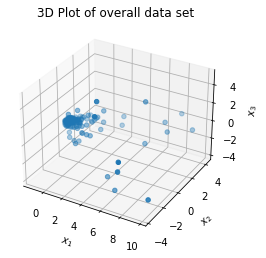

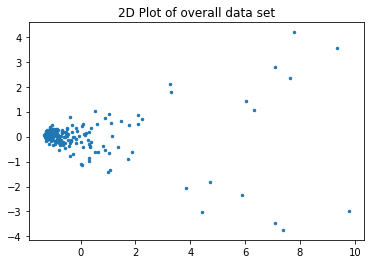

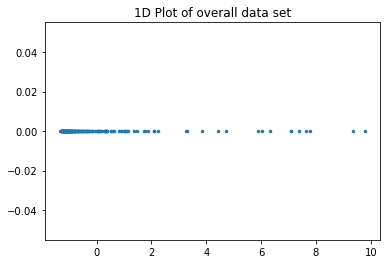

Explained variance per first 10 principle components:
Dim                   0         1         2         3         4         5  \
Expl. variance  0.21402  0.036035  0.032442  0.026471  0.024942  0.024654   

Dim                    6         7         8         9  
Expl. variance  0.024218  0.021101  0.019537  0.018768  


In [122]:
pca_analysis(X_clean, 10)

Result of this table: First principle component is responsible for 21.4% of variance. Second factor 3.6% and third 3.2%. The remaining factors have less than 2.6% falling down slowly . This supports the 3D plot where we saw a agglomeration at one point and more variance along one axis. 

## Part 2: Cluster analysis

In [123]:
X_clusterd_t = X_clusterd.T
X_clusterd_t["created"] = pd.to_datetime(X_clusterd_t["created"])
cluster_0 = X_clusterd_t[X_clusterd_t["Cluster-ID"] == 0]
cluster_0 = cluster_0.sort_values(by='created')
cluster_0

ID,created,T1548.002,T1134,T1134.002,T1134.001,T1087.002,T1087.003,T1087.001,T1071,T1071.004,...,T1125,T1497,T1497.001,T1497.003,T1102,T1102.002,T1102.001,T1102.003,T1047,Cluster-ID
S0066,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0042,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
S0037,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
S0009,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0068,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0067,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0003,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0043,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0054,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
S0159,2017-12-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


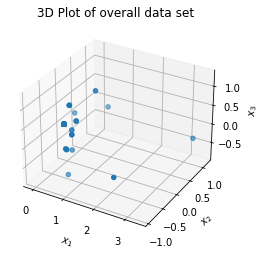

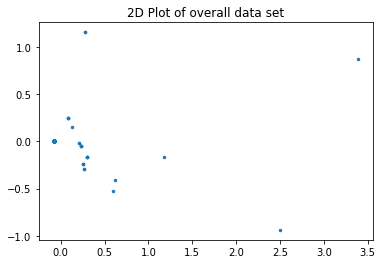

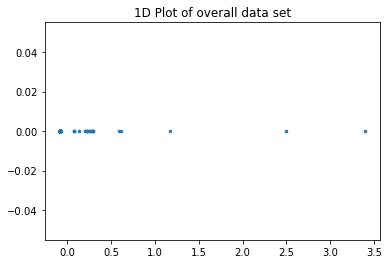

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.426547  0.106333  0.105501  0.083002  0.062989


In [124]:
pca_analysis(cluster_0.T.drop(["created", "Cluster-ID"]), 5)


--- Cluster 0 ---


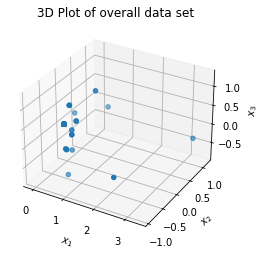

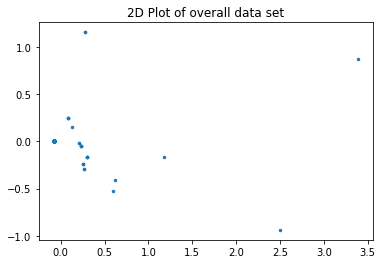

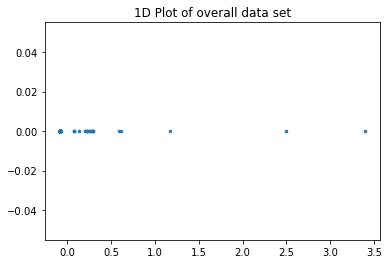

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.426547  0.106333  0.105501  0.083002  0.062989

--- Cluster 1 ---


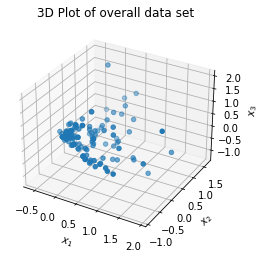

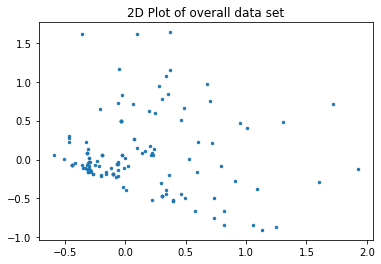

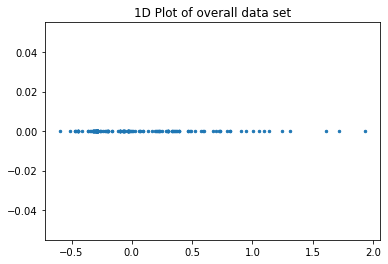

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.108467  0.093455  0.066674  0.063412  0.057551

--- Cluster 2 ---


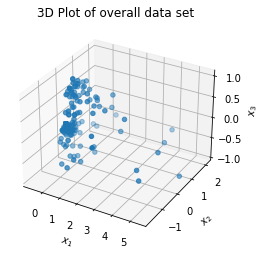

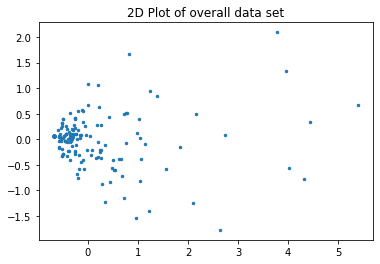

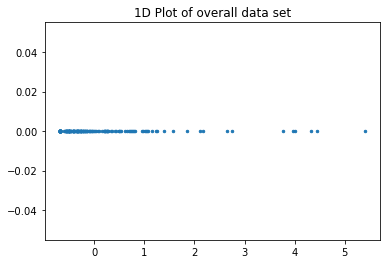

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.283036  0.058233  0.053748  0.050046  0.041814

--- Cluster 3 ---


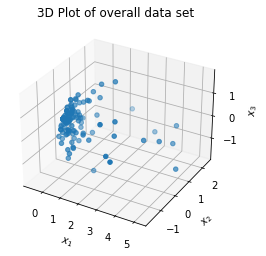

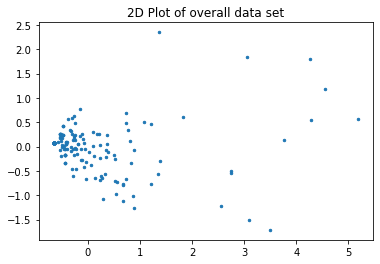

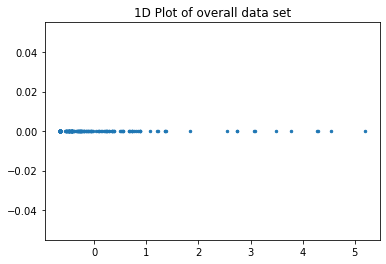

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.324099  0.064594  0.054731  0.047246  0.043946

--- Cluster 4 ---


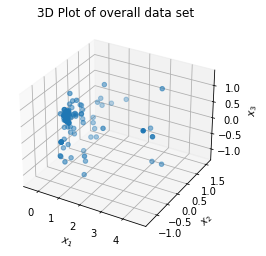

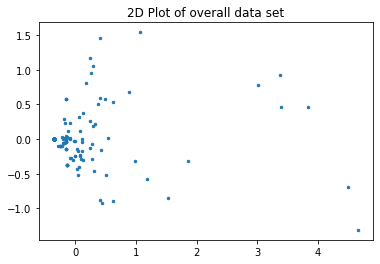

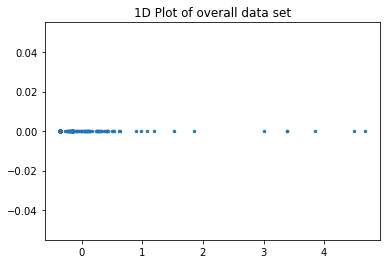

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.334274  0.065936  0.060721  0.053158  0.049965

--- Cluster 5 ---


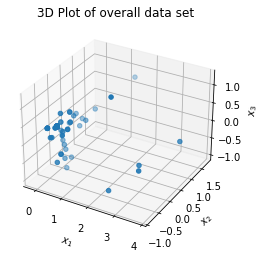

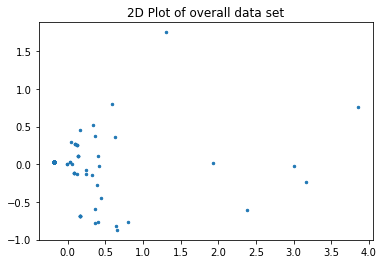

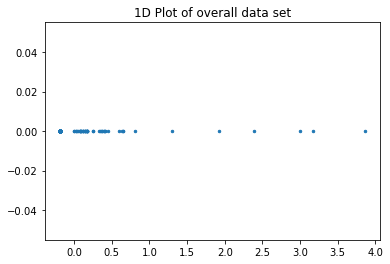

Explained variance per first 5 principle components:
Dim                   0         1         2         3         4
Expl. variance  0.41278  0.098646  0.080782  0.068566  0.054025

--- Cluster 6 ---


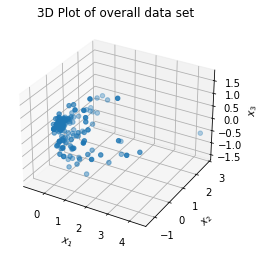

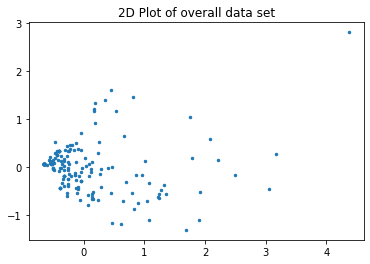

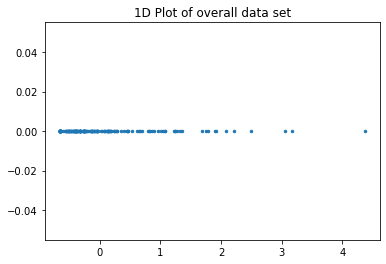

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.174393  0.070826  0.058873  0.055631  0.052618

--- Cluster 7 ---


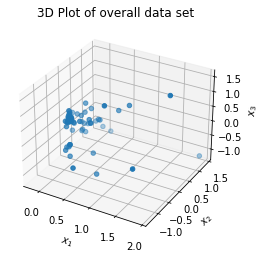

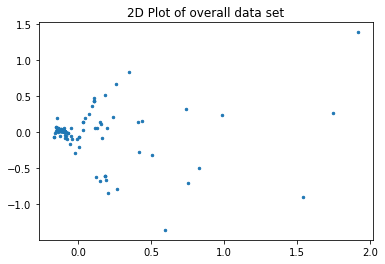

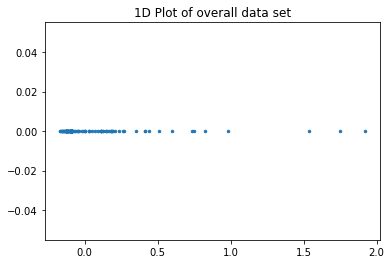

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.083095  0.067246  0.066297  0.047741  0.045779

--- Cluster 8 ---


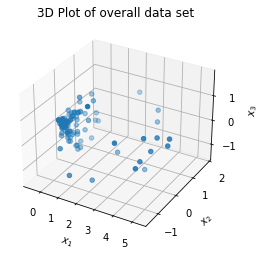

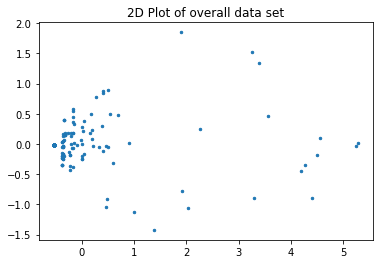

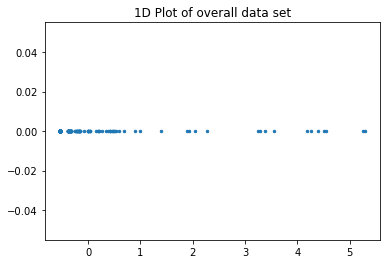

Explained variance per first 5 principle components:
Dim                    0         1         2         3        4
Expl. variance  0.456476  0.044271  0.041991  0.039693  0.03751

--- Cluster 9 ---


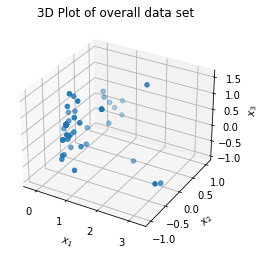

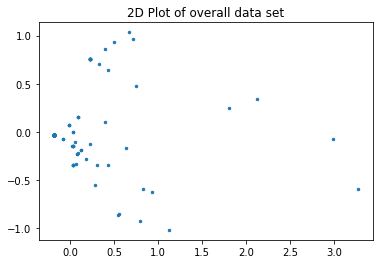

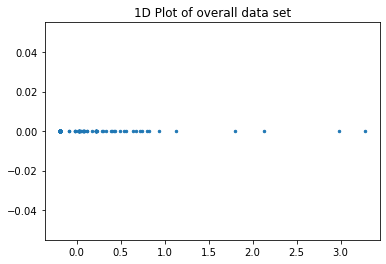

Explained variance per first 5 principle components:
Dim                    0         1         2         3         4
Expl. variance  0.306429  0.135431  0.111417  0.074662  0.064179


In [128]:
for i in range(max(X_clusterd_t["Cluster-ID"]) + 1):
    print("")
    print(f"--- Cluster {i} ---")
    cluster_i = X_clusterd_t[X_clusterd_t["Cluster-ID"] == i]
    pca_analysis(cluster_i.T.drop(["created", "Cluster-ID"]), 5)

## Dimensionality reduction plot inside clusters

Hereafter, we performed 3D plots powered by PCA reduction inside **clusters**. The color indicates the order from older to newer software

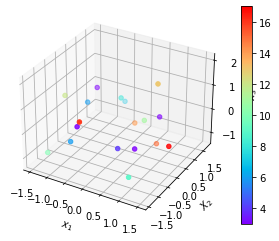

In [33]:
nullerPCA = SKdecom.PCA(n_components=3)

X_nuller = cluster_0.drop(["created"], axis=1)

nullerPCA.fit(X_nuller)
X_nuller = nullerPCA.transform(X_nuller)
X_nuller = pd.DataFrame(X_nuller)

c_dict = cluster_0['created'].map(pd.Series(data=np.arange(len(cluster_0['created'])), index=cluster_0['created'].values).to_dict())


fig = plt.figure()
ax = fig.add_subplot(projection='3d')
im = ax.scatter(X_nuller[0], X_nuller[1], X_nuller[2], c=c_dict, cmap=plt.cm.rainbow)
ax.set_xlabel(f'$x_1$')
ax.set_ylabel(f'$X_2$')
ax.set_zlabel(f'$x_3$')


plt.colorbar(im)

plt.show()

In [186]:
def plotCluster(cluster):
    clusterSVD = SKdecom.TruncatedSVD(n_components=3)

    X_cluster = cluster.drop(["created"], axis=1)
    clusterSVD.fit(X_cluster)
    X_cluster = clusterSVD.transform(X_cluster)
    X_cluster = pd.DataFrame(X_cluster)

    #c_dict = cluster['created'].map(pd.Series(data=np.arange(len(cluster['created'])), index=cluster['created'].values).to_dict())
    c_dict = cluster['created'].map(pd.Series(data=np.arange(cluster['created'].value_counts().count()), index=cluster['created'].value_counts().index).to_dict())

    colors = {'North America':'red', 'Europe':'green', 'Asia':'blue', 'Australia':'yellow'}

    
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    im = ax.scatter(X_cluster[0], X_cluster[1], X_cluster[2], c=c_dict, cmap=plt.cm.rainbow)
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')


    plt.colorbar(im)

    plt.show()

In [178]:
cluster_3['created'].value_counts()

2017-05-31    14
2018-01-16     4
2018-04-18     2
Name: created, dtype: int64

In [180]:
cluster_3['created'].map(pd.Series(data=np.arange(cluster_3['created'].value_counts().count()), index=cluster_3['created'].value_counts().index).to_dict())

S0114    0
S0025    0
S0222    2
S0061    0
S0135    0
S0047    0
S0010    0
S0033    0
S0174    1
S0195    2
S0188    1
S0146    0
S0011    0
S0183    1
S0178    1
S0022    0
S0027    0
S0008    0
S0071    0
S0102    0
Name: created, dtype: int64

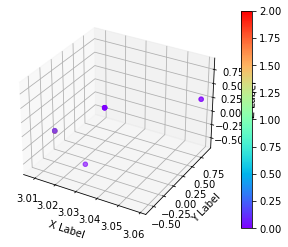

In [187]:
plotCluster(cluster_3)

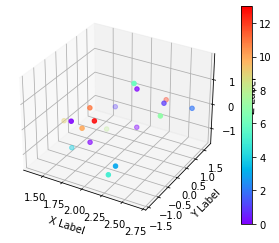

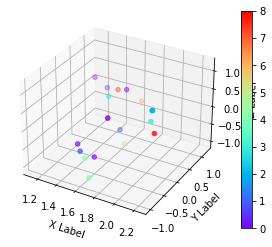

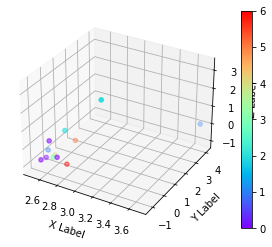

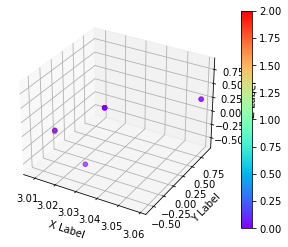

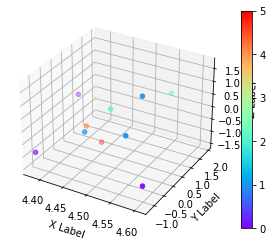

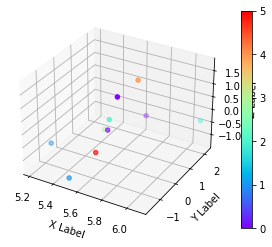

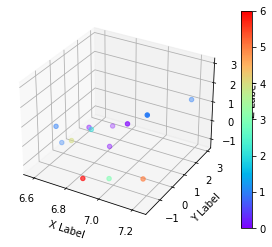

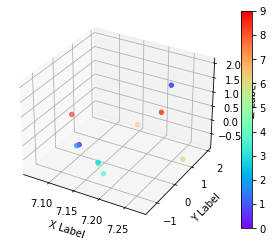

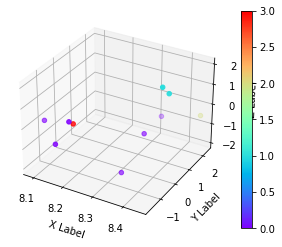

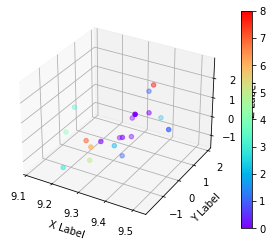

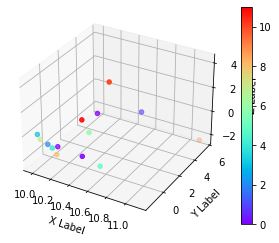

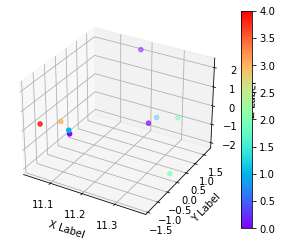

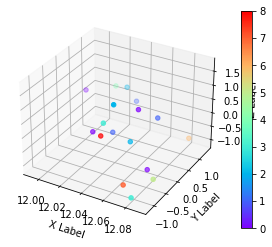

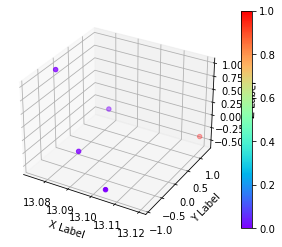

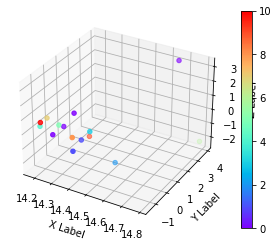

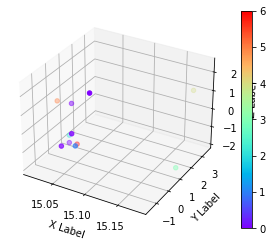

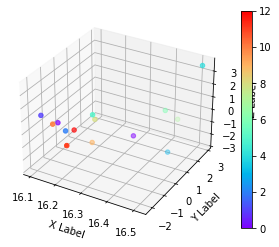

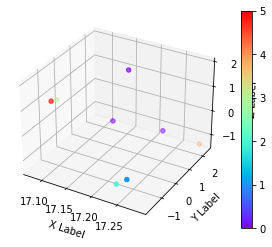

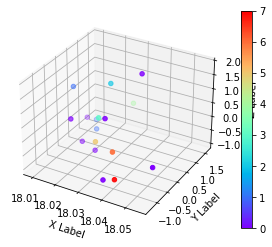

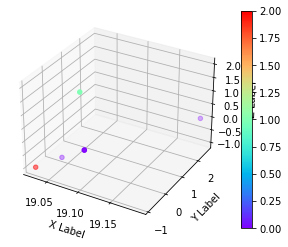

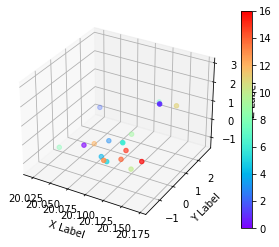

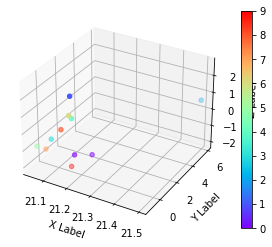

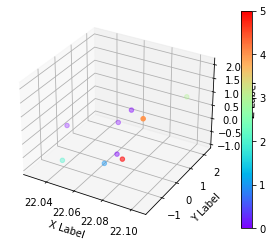

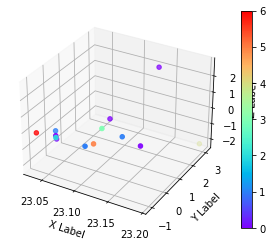

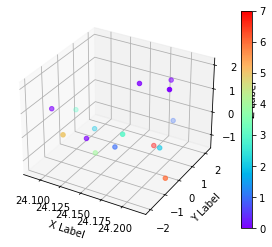

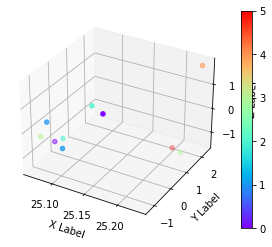

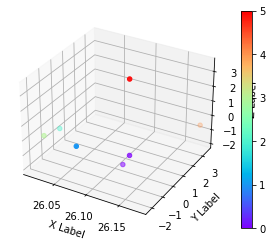

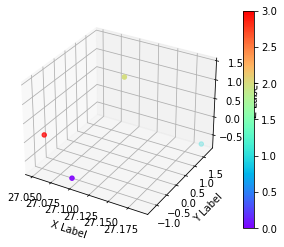

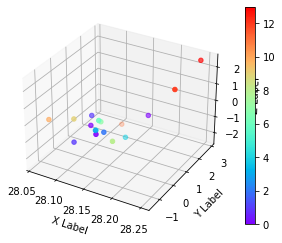

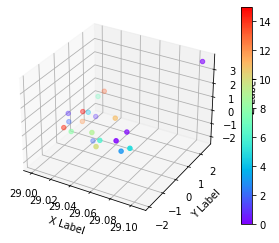

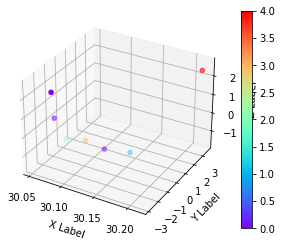

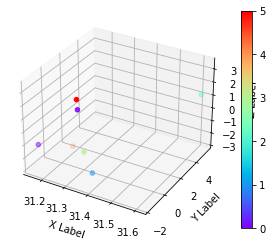

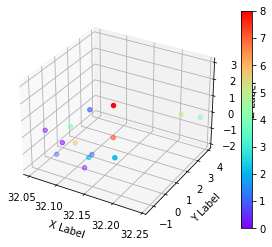

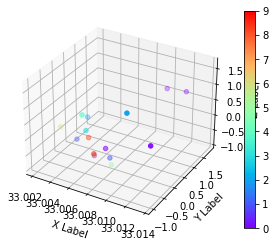

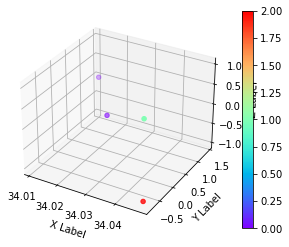

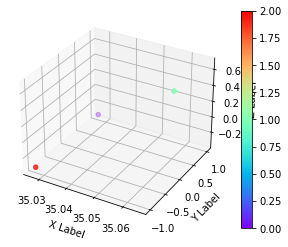

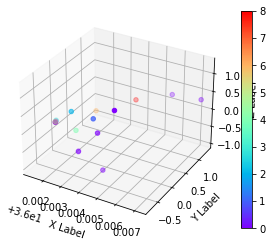

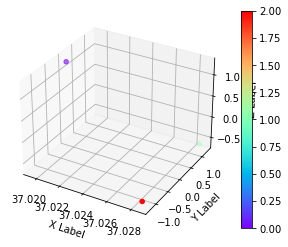

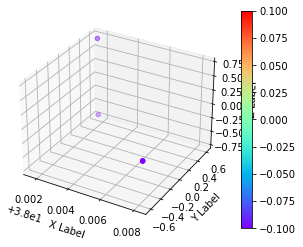

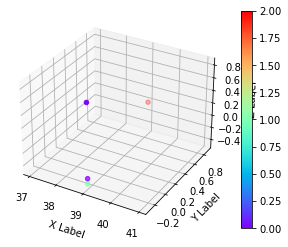

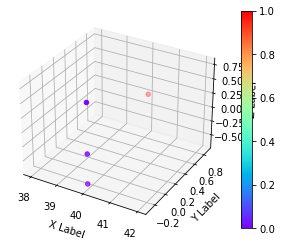

/Users/tobiasbudig/opt/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_truncated_svd.py:197: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


KeyError: 1

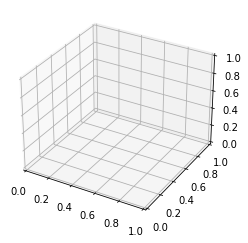

In [188]:
for i in range(43):
    cluster_i = clustered_t[clustered_t["Cluster-ID"] == i]
    plotCluster(cluster_i)

In [47]:
clustering_40 = pd.read_excel("./clustering_x_max40.xlsx")
clustering_40 = clustering_40.set_index(["ID"])
clustering_40 = clustering_40.transpose()
clustering_40["created"] = pd.to_datetime(clustering_40["created"])
clustering_40

ID,created,T1548.002,T1548.001,T1134,T1134.002,T1134.004,T1134.005,T1134.001,T1531,T1087.002,...,T1497,T1497.001,T1497.003,T1497.002,T1102,T1102.002,T1102.001,T1102.003,T1047,Cluster-ID
S0066,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
S0065,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
S0045,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
S0073,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0092,2017-05-31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S0455,2020-05-26,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,10
S0457,2020-05-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,7
S0459,2020-05-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
S0458,2020-05-27,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10


In [49]:
maxClusters = max(clustering_40["Cluster-ID"])
maxClusters 

13

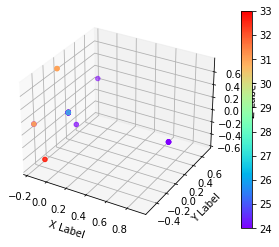

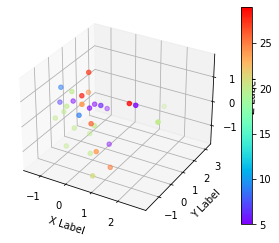

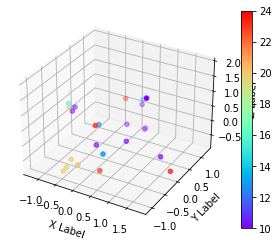

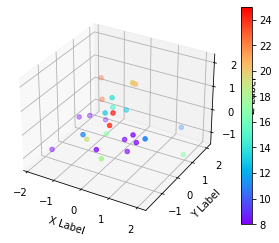

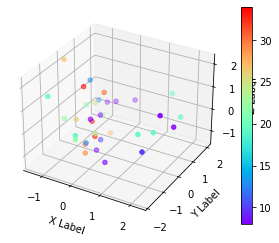

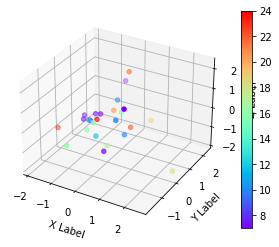

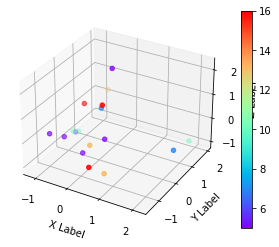

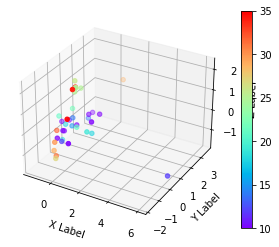

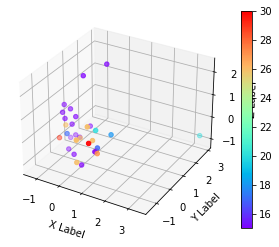

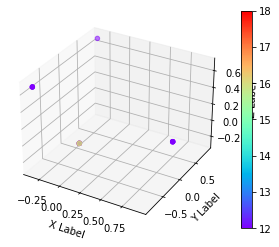

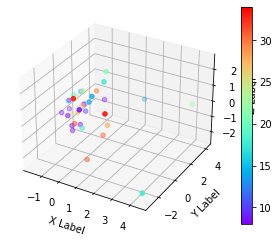

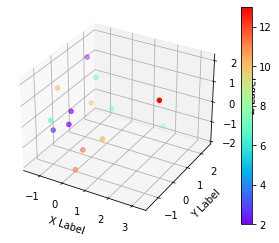

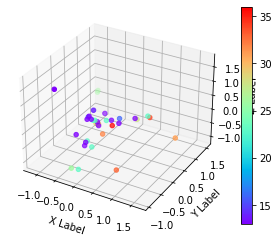

In [50]:
for i in range(maxClusters):
    cluster_i = clustering_40[clustering_40["Cluster-ID"] == i]
    plotCluster(cluster_i)

In [105]:
cluster_0.drop("created", axis=1)

ID,T1548.002,T1548.001,T1134,T1134.002,T1134.004,T1134.005,T1134.001,T1531,T1087.002,T1087.003,...,T1497,T1497.001,T1497.003,T1497.002,T1102,T1102.002,T1102.001,T1102.003,T1047,Cluster-ID
S0093,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
S0060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0186,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S0381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [133]:
cluster_0.shape

(18, 271)

In [127]:
# von oben
def maxSVDScore(data, dim):
    
    n = dim + 1
    score = []
    for i in range(1,n):

        score.append(varianceTest(data.drop(["created"], axis=1), i))

    x_val = np.linspace(1, 1, n-1)
    #print(len(x_val))
    #print(len(score))
    df_score = pd.DataFrame(score)
    df_score['Total'] = df_score.sum(axis=1)
    return float(df_score['Total'][-1:])

In [128]:
maxSVDScore(cluster_0 ,16)

0.970117365023209

In [149]:
explained = []
numberOfElements = []
for i in range(maxClusters):
    cluster_i = clustering_40[clustering_40["Cluster-ID"] == i]
    explained.append(maxSVDScore(cluster_i ,7))
    numberOfElements.append(cluster_i.shape[0])


data = np.array([explained, numberOfElements]).T
#data.shape
#print(data.shape)
pd.DataFrame(data=data,columns=["explained", "number"] )

,explained,number
0,0.430945,34.0
1,0.462146,30.0
2,0.715788,25.0
3,0.526863,26.0
4,0.421231,35.0
5,0.551022,25.0
6,0.647896,17.0
7,0.433754,36.0
8,0.532808,31.0
9,0.459581,19.0


In [129]:
number_of_timestamps = []
k = 0
for i in range(maxClusters):
    cluster_i = clustering_40[clustering_40["Cluster-ID"] == i]
    print(cluster_i["created"].value_counts())
    if(k > 1): break
        


NameError: name 'maxClusters' is not defined

In [160]:
from datetime import datetime

In [265]:
for i in range(max(X_clusterd_t["Cluster-ID"]) + 1):
    #print("")
    #print(f"--- Cluster {i} ---")
    cluster_i = X_clusterd_t[X_clusterd_t["Cluster-ID"] == i]
    #print(cluster_i["created"].value_counts())
    
    cluster_i_clean = cluster_i.T.drop(["created", "Cluster-ID"])
    
    # fit PCA
    pca3.fit(cluster_i_clean.T)
    
    # tranform to new principle componten basis
    X3 = pca3.transform(cluster_i_clean.T)

    x3, y3, z3 = np.hsplit(X3, 3)
    
    """
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(x3, y3, z3)
    ax.set_xlabel(f'$x_1$')
    ax.set_ylabel(f'$x_2$')
    ax.set_zlabel(f'$x_3$')
    plt.title("3D Plot of overall data set")
    plt.show()
    
    """
    T = cluster_i["created"].value_counts().sum() # Number of items
   
  
    # setup the plot
    fig, ax = plt.add_subplot(1,1, figsize=(6,6), projection='3d')
    # define the data
    x = np.random.rand(1000)
    y = np.random.rand(1000)
    #print(" - ----------")
    #print(" ")
    
    temp = pd.DataFrame([])
    #print(cluster_i["created"].shape)
    temp["created"] = cluster_i["created"]
    temp["label"] =  np.zeros(cluster_i["created"].shape[0])
    j = 0
    for time in temp["created"].unique():
        #print("")
        #print("durchlauf", j)
        #print("time", time)
        #print(temp[ temp["created"] == time ].index)
        for software in temp[ temp["created"] == time ].index:
            #print("software", software)
            temp["label"][software] = j
        j +=1
        
    N = j
        
    #print("temp", temp.shape , temp)
    #print(" -----------")
    tag = np.asarray(temp["label"]).reshape(T, 1)
    #print("tag", tag.shape)
    
    #break
    #tag = np.datetime64(cluster_i["created"].apply( pd.to_datetime) ).reshape(N, 1) # Tag each point with a corresponding label    
    
    #print("x shape ", x3.shape)
    #print("cluster shape", cluster_i.shape)
    #print("cluster trans shape", X3.shape)
    #print("label shape", np.asarray(cluster_i["created"]).reshape(T, 1))

    # define the colormap
    cmap = plt.cm.jet
    # extract all colors from the .jet map
    cmaplist = [cmap(i) for i in range(cmap.N)]
    # create the new map
    cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

    # define the bins and normalize
    bounds = np.linspace(0,N,N+1)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # make the scatter
    scat = ax.scatter(x3,y3,z3,c=tag,s=9,cmap=cmap,  norm=norm)
    # create the colorbar
    cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
    cb.set_label('Custom cbar')
    ax.set_title('Discrete color mappings')
    plt.show()
    
    
    

AttributeError: module 'matplotlib.pyplot' has no attribute 'add_subplot'